In [1]:
import torch
import pandas as pd
import os

In [43]:
class TitlePartyModel(torch.nn.Module):
    def __init__(self):
        super(TitlePartyModel, self).__init__()
        self.input = torch.nn.Linear(2048,2048, dtype=torch.float32)
        self.input_activation = torch.nn.Sigmoid()
        self.hidden1 = torch.nn.Linear(2048,1024)
        self.hidden1_activation = torch.nn.Sigmoid()
        self.hidden2 = torch.nn.Linear(1024,128)
        self.hidden2_activation = torch.nn.Sigmoid()
        # 4 political party choices
        self.hidden3 = torch.nn.Linear(128,4)
        self.output = torch.nn.Softmax()

    def forward(self, x):
        x = self.input(x)
        x = self.input_activation(x)
        x = self.hidden1(x)
        x = self.hidden1_activation(x)
        x = self.hidden2(x)
        x = self.hidden2_activation(x)
        x = self.hidden3(x)
        x = self.output(x)
        return x



In [3]:
title_model = TitlePartyModel()
print("the model")
print(title_model)
print("just the 2nd layer")
print(title_model.hidden1)
print("parameters")
for p in title_model.parameters():
    print(p)
print("2nd layer params")
for p in title_model.hidden1.parameters():
    print(p)

the model
TitlePartyModel(
  (input): Linear(in_features=2048, out_features=2048, bias=True)
  (input_activation): Sigmoid()
  (hidden1): Linear(in_features=2048, out_features=1024, bias=True)
  (hidden1_activation): Sigmoid()
  (hidden2): Linear(in_features=1024, out_features=128, bias=True)
  (hidden2_activation): Sigmoid()
  (hidden3): Linear(in_features=128, out_features=4, bias=True)
  (output): Softmax(dim=None)
)
just the 2nd layer
Linear(in_features=2048, out_features=1024, bias=True)
parameters
Parameter containing:
tensor([[-0.0196, -0.0152, -0.0169,  ...,  0.0058, -0.0030, -0.0084],
        [-0.0201, -0.0107, -0.0048,  ...,  0.0093, -0.0132,  0.0191],
        [-0.0071,  0.0046,  0.0114,  ..., -0.0028,  0.0165,  0.0031],
        ...,
        [ 0.0016, -0.0090,  0.0186,  ...,  0.0184, -0.0208, -0.0085],
        [ 0.0102, -0.0039, -0.0145,  ..., -0.0048, -0.0115, -0.0006],
        [-0.0142,  0.0072, -0.0145,  ...,  0.0125,  0.0216, -0.0064]],
       requires_grad=True)
Paramete

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import fnmatch
import numpy as np

In [6]:
train_files = []
test_files = []
split = 0.7
token_path = os.path.join(os.getcwd(),"..","data","tokenized")
print(token_path)
for root, dirs, files in os.walk(token_path):
    for f in files:
        if fnmatch.fnmatch(f, "*shrunk*"):
            if np.random.sample(1) <= split:
                print(f'train: {f}')
                train_files.append(os.path.join(root, f))
            else:
                print(f'test : {f}')
                test_files.append(os.path.join(root, f))
print(train_files)
print(test_files)

C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized
train: summary_bill_1811_1393180-shrunk.pkl
train: summary_bill_1811_1393181-shrunk.pkl
train: summary_bill_1811_1470063-shrunk.pkl
train: summary_bill_1811_1506887-shrunk.pkl
test : summary_bill_1959_1542899-shrunk.pkl
train: summary_bill_1959_1545862-shrunk.pkl
train: summary_bill_1959_1546074-shrunk.pkl
train: summary_bill_1959_1546096-shrunk.pkl
['C:\\Users\\benja\\git-projects\\bitbucket\\nlp_legislation_prediction\\training\\..\\data\\tokenized\\summary_bill_1811_1393180-shrunk.pkl', 'C:\\Users\\benja\\git-projects\\bitbucket\\nlp_legislation_prediction\\training\\..\\data\\tokenized\\summary_bill_1811_1393181-shrunk.pkl', 'C:\\Users\\benja\\git-projects\\bitbucket\\nlp_legislation_prediction\\training\\..\\data\\tokenized\\summary_bill_1811_1470063-shrunk.pkl', 'C:\\Users\\benja\\git-projects\\bitbucket\\nlp_legislation_prediction\\training\\..\\data\\tokenized\\summary_bill_1811_1506887-

In [19]:
class SummaryDataSet(torch.utils.data.Dataset):
    def __init__(self, file_path_arr):
        self.data_frames = []
        for f in file_path_arr:
            print(f"loading {f}")
            self.data_frames.append(pd.read_pickle(f, compression="gzip"))

    def __len__(self):
        return 1
#        return len(self.data_frames)

    def __getitem__(self, idx):
        next_df = self.data_frames[0]
        party = next_df["party"][0] # they are all the same, so just pick the first one
        encoding = torch.tensor(np.array(next_df["input_shrunk"]),dtype=torch.float)
        # 4 politcal party choices
        party_arr = np.zeros(4,dtype=int)
        # the party index was stored as value with a starting index of 1 -- rethink this
        party_arr[party-1] = 1 # set the value to 1 for the party index
        return encoding, torch.tensor(party_arr,dtype=torch.float)

In [8]:
from torch.utils.data import DataLoader
train_data_set = SummaryDataSet(train_files)
test_data_set = SummaryDataSet(test_files)
train_loader = DataLoader(train_data_set,batch_size=1,shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=1, shuffle=True)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393180-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393181-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1470063-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1506887-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1959_1545862-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1959_1546074-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1959_1546096-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [20]:
def train_one_epoch(epoch_idx, model, summary_writer):
    running_loss = 0
    last_loss = 0.
    for i, data in enumerate(train_loader):
        inputs, label = data
        input_tensor = inputs.view(1,-1)
        outputs = model(input_tensor)
        loss = loss_fn(outputs, label)
        last_loss = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        summary_idx = i * len(train_loader) + i + 1
        summary_writer.add_scalar("loss/train", last_loss, summary_idx)
    return last_loss

In [59]:
title_model = TitlePartyModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(title_model.parameters(), lr=0.001, momentum=0.9)

In [60]:
import datetime
from torch.utils.tensorboard import SummaryWriter
start_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
writer = SummaryWriter('runs/fashion_trainer_{}'.format(start_time))
EPOCHS = 100
epoch_num = 0
val_losses = []
train_losses = []
for epoch in range(EPOCHS):
    print("turn on training")
    title_model.train(True)
    print("running one epoch")
    last_epoch_loss = train_one_epoch(epoch_num,title_model, writer)
    train_losses.append(last_epoch_loss)
    print("turn off training")
    print(f'epoch loss {last_epoch_loss}')

    # title_model.train(False)

    running_validation_loss = 0.0
    print("applying model.eval()")
    title_model.eval()
    with (torch.no_grad()):
        for i, vdata in enumerate(train_loader):
            print(f"validation {i}")
            vinputs, vlabel = vdata
            print(f"label : {vlabel}")
            voutputs = title_model(vinputs)
            print(f"vOutput: {voutputs}")
            vloss = loss_fn(voutputs, vlabel)
            running_validation_loss += vloss

    avg_vloss = running_validation_loss / len(test_loader)
    val_losses.append(avg_vloss)
    print('LOSS train {} valid {}'.format(last_epoch_loss, avg_vloss))
#    writer.add_scalars("Training vs Valiation loss",{"training": last_epoch_loss, "validation": avg_vloss}, epoch_num+1)
#    writer.flush()
    epoch_num += 1

turn on training
running one epoch
turn off training
epoch loss 0.2062525749206543
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[0.9511, 0.0228, 0.0131, 0.0130]])
LOSS train 0.2062525749206543 valid 0.0008114652591757476
turn on training
running one epoch
turn off training
epoch loss 0.0008114652591757476
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[0.9846, 0.0071, 0.0041, 0.0042]])
LOSS train 0.0008114652591757476 valid 8.02781869424507e-05
turn on training
running one epoch
turn off training
epoch loss 8.02781869424507e-05
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[0.9946, 0.0024, 0.0015, 0.0015]])
LOSS train 8.02781869424507e-05 valid 9.81954963208409e-06
turn on training
running one epoch
turn off training
epoch loss 9.81954963208409e-06
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[9.9792e-01, 9.2857e-04, 5.6224

C:\Users\benja\AppData\Local\Temp\ipykernel_30240\2359741441.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


turn off training
epoch loss 1.4642877204096294e-06
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[9.9912e-01, 3.8856e-04, 2.3907e-04, 2.5540e-04]])
LOSS train 1.4642877204096294e-06 valid 2.632287703363545e-07
turn on training
running one epoch
turn off training
epoch loss 2.632287703363545e-07
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[9.9959e-01, 1.7728e-04, 1.1066e-04, 1.2011e-04]])
LOSS train 2.632287703363545e-07 valid 5.616389131546384e-08
turn on training
running one epoch
turn off training
epoch loss 5.616389131546384e-08
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[9.9980e-01, 8.7466e-05, 5.5312e-05, 6.0894e-05]])
LOSS train 5.616389131546384e-08 valid 1.3974740475930503e-08
turn on training
running one epoch
turn off training
epoch loss 1.3974740475930503e-08
applying model.eval()
validation 0
label : tensor([[1., 0., 0., 0.]])
vOutput: tensor([[9.

In [65]:
val_loss_values = list(map(lambda x : x.item(), val_losses))
train_losses[-1]

4.512374564172132e-14

In [62]:
from matplotlib import pyplot as plt

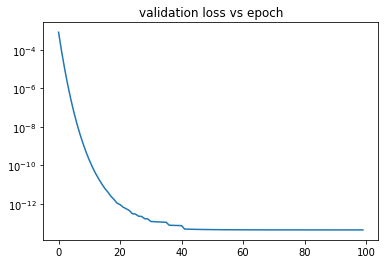

In [63]:
plt.plot(range(100), val_losses)
plt.yscale('log')
plt.title("validation loss vs epoch")
plt.show()

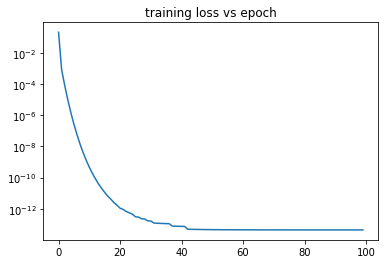

In [64]:
plt.plot(range(100), train_losses)
plt.yscale('log')
plt.title("training loss vs epoch")
plt.show()